In [53]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [54]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


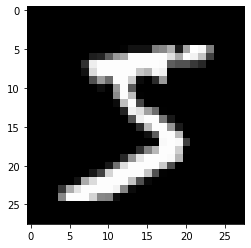

In [56]:
plt.imshow(X_train[0], cmap='gray')

In [57]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)


In [58]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [59]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [60]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [61]:
X_train, X_test = X_train/255, X_test/255

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import MaxPooling2D, Conv2D

def my_convnet_1():
    model=Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    
    #turn out neurons to prevent overfitting
    model.add(Dense(10, activation='softmax'))
    
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [63]:
model=my_convnet_1()

In [64]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)              

In [65]:
history=model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=256, verbose=1, shuffle=True)

Epoch 1/8
188/188 [==============================] - 23s 120ms/step - loss: 0.3023 - accuracy: 0.9050 - val_loss: 0.0704 - val_accuracy: 0.9794
Epoch 2/8
188/188 [==============================] - 23s 121ms/step - loss: 0.1189 - accuracy: 0.9657 - val_loss: 0.0565 - val_accuracy: 0.9832
Epoch 3/8
188/188 [==============================] - 21s 113ms/step - loss: 0.1008 - accuracy: 0.9710 - val_loss: 0.0535 - val_accuracy: 0.9836
Epoch 4/8
188/188 [==============================] - 20s 108ms/step - loss: 0.0920 - accuracy: 0.9729 - val_loss: 0.0483 - val_accuracy: 0.9858
Epoch 5/8
188/188 [==============================] - 19s 102ms/step - loss: 0.0838 - accuracy: 0.9751 - val_loss: 0.0408 - val_accuracy: 0.9881
Epoch 6/8
188/188 [==============================] - 19s 104ms/step - loss: 0.0814 - accuracy: 0.9760 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 7/8
188/188 [==============================] - 21s 114ms/step - loss: 0.0731 - accuracy: 0.9778 - val_loss: 0.0576 - val_accuracy:

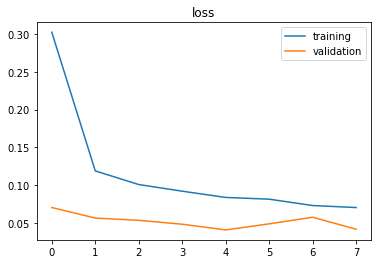

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['training', 'validation'])
plt.show()

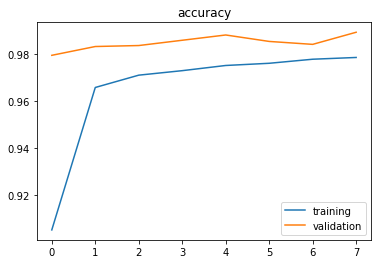

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [70]:
score = model.evaluate(X_test, y_test, verbose=0)

In [71]:
score

[0.037583865225315094, 0.9882000088691711]

In [75]:
model.save('CNN_model.h5')